In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
data_frame_1=pd.read_csv("/home/onyxia/work/NLP_3A_ENSAE/data_bases/firstname_with_sex.csv",sep=";")
data_frame_2=pd.read_csv("/home/onyxia/work/NLP_3A_ENSAE/data_bases/transcriptions_with_sex.csv",sep=",")

In [7]:
data_frame_2_cleaned=data_frame_2[['sex']].copy()

In [8]:

data_frame_2['prediction'] = data_frame_2['prediction'].astype(str)

# Créez une nouvelle liste pour stocker les prénoms
first_names = []
surname_list = []
# Parcourez chaque observation dans la colonne 'prediction'
for prediction in data_frame_2['prediction']:
   
    first_name = prediction.split()[3]
    surname = prediction.split()[1]
    # Ajoutez le prénom à la liste
    first_names.append(first_name)
    surname_list.append(surname)


# Ajoutez la liste des prénoms comme une nouvelle colonne dans le dataframe
data_frame_2_cleaned['first_name'] = first_names
data_frame_2_cleaned['surname'] = surname_list

In [9]:
data_frame_2_cleaned = data_frame_2_cleaned[data_frame_2_cleaned['sex'] != 'ambigu']

In [10]:
data_frame_2_cleaned.head()

,sex,first_name,surname
0,femme,Marie,Chardon
1,homme,Louis,Lhopital
2,femme,Marie,Pyrin
3,femme,Marie,Lavocat
4,femme,Marguerite,Benne


([<matplotlib.axis.XTick at 0x7f10ef92a950>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

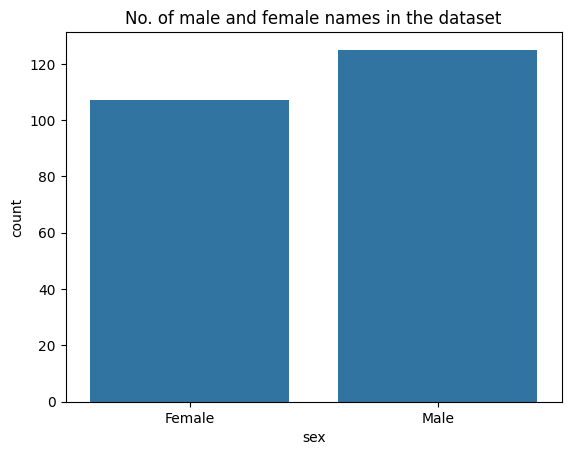

In [11]:
sns.countplot(x='sex',data =data_frame_2_cleaned )
plt.title('No. of male and female names in the dataset')
plt.xticks([0,1],('Female','Male'))

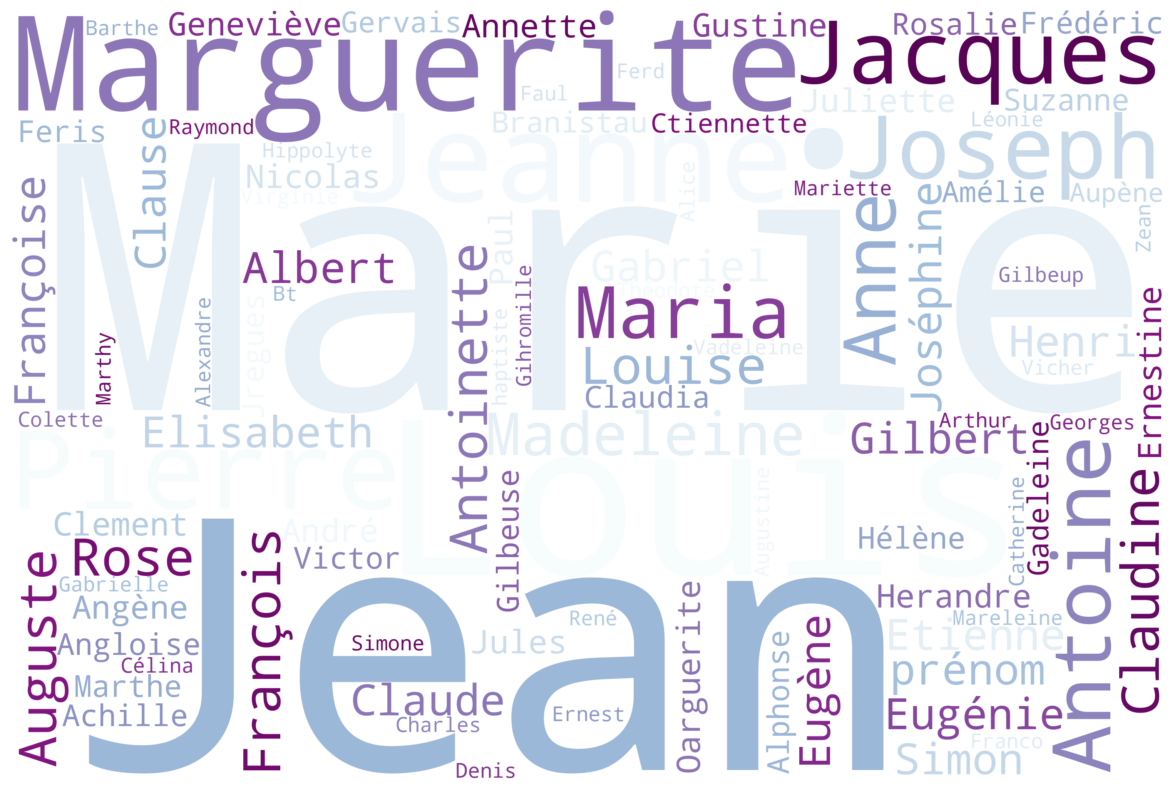

In [12]:

# Joining first names into a single string
text = " ".join(i for i in data_frame_2_cleaned.first_name)

# Creating WordCloud with Arial font
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="white",
    colormap="BuPu",
    collocations=False,  # specify the path to the Arial font file on your system
).generate(text)

# Display the WordCloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()